# Baseline model only use "keyword", "location" column by RF
This notebook contains simple EDA and preprocess procedure.  
It's not a fine tuned model, so just look this notebook as insight and fun.

# First import library and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
X = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/train.csv")
X_test = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/test.csv")

In [3]:
X

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
X["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [5]:
X["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [6]:
X["keyword"].isna().sum()

61

In [7]:
X["location"].isna().sum()

2533

Looks like *keyword* column doesn't have much categories and null values.  
But *location* column has just opposite distribution and null values, compared to *keyword* column

# Keyword, Location correlation with target
Because I want to plot histogram, I use LabelEncoder to make str columns to int values.

In [8]:
k_encoder = LabelEncoder()
X["keyword"] = k_encoder.fit_transform(X["keyword"])

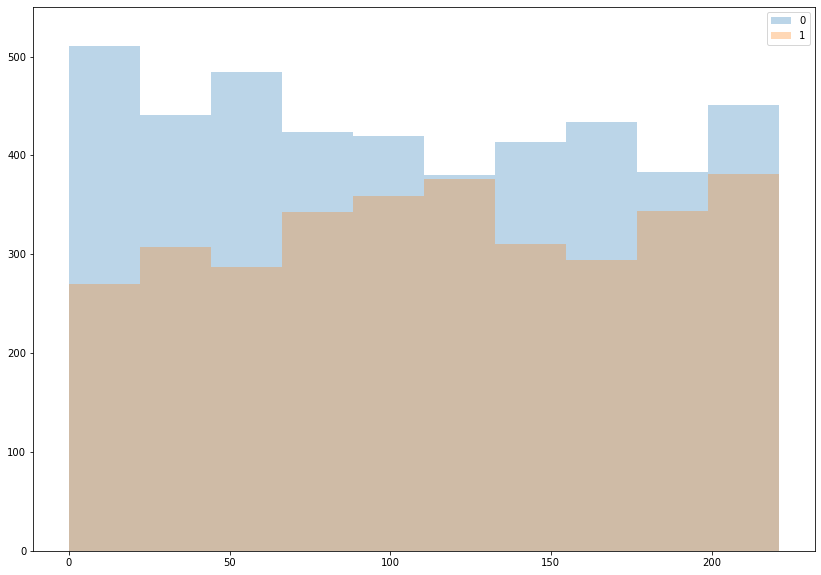

In [9]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 550)
plt.hist(X["keyword"][X["target"]==0], alpha=0.3, label="0")
plt.hist(X["keyword"][X["target"]==1], alpha=0.3, label="1")
plt.legend()
plt.show()

Because 0 has more values in *target* , It is sure that Blue is higher than orange.  
But some categories are too high or low than orange. It means model can use this data useful.

In [10]:
l_encoder = LabelEncoder()
X["location"] = l_encoder.fit_transform(X["location"])

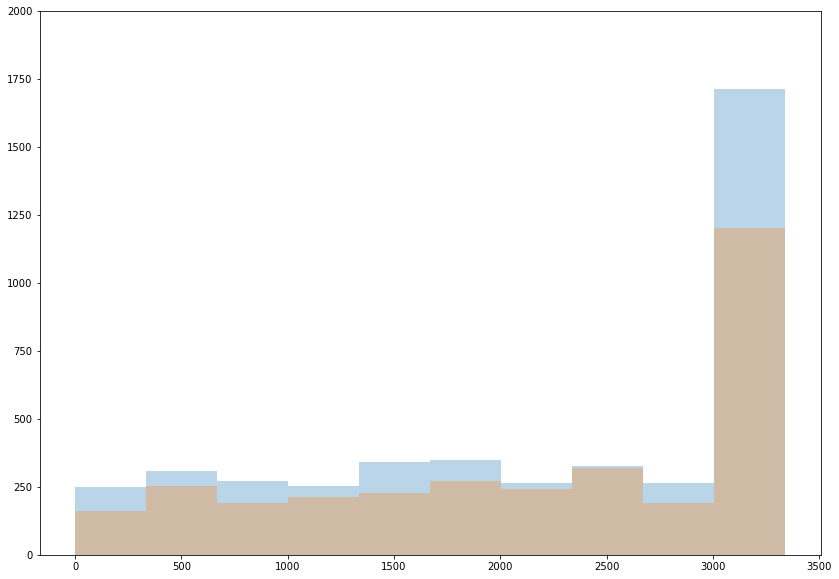

In [11]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 2000)
plt.hist(X["location"][X["target"]==0], alpha=0.3, label="0")
plt.hist(X["location"][X["target"]==1], alpha=0.3, label="1")
plt.show()

It has too much nan value, so I will plot without that.

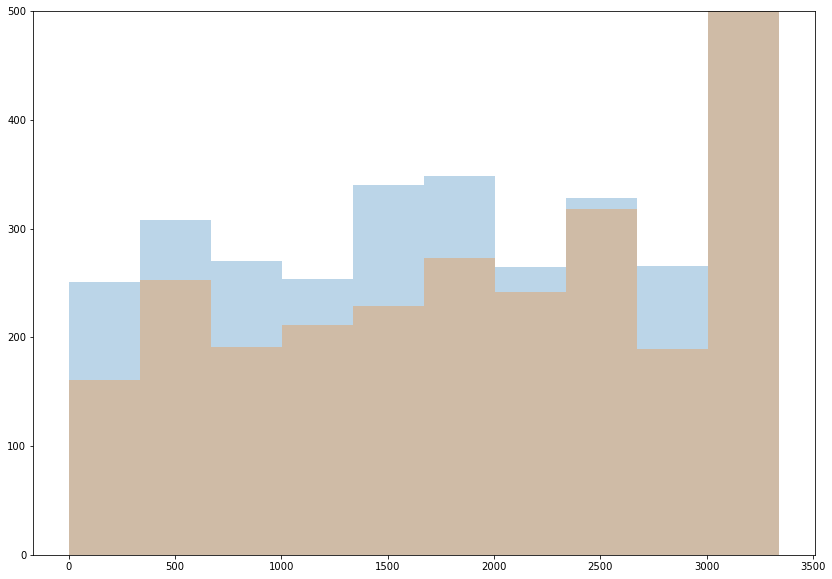

In [12]:
plt.figure(figsize=(14, 10))
plt.ylim(0, 500)
plt.hist(X["location"][X["target"]==0], alpha=0.3, label="0")
plt.hist(X["location"][X["target"]==1], alpha=0.3, label="1")
plt.show()

Anyway It has too much Nan value, I think it will not be a good feature for model.

# Make and Train model 
I use RandomForest without hp searching.

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X[["keyword", "location"]], X["target"], stratify=X["target"])

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
model.score(X_valid, y_valid)

0.6743697478991597

In [17]:
model = RandomForestClassifier()
model.fit(X[["keyword", "location"]], X["target"])

RandomForestClassifier()

In [18]:
model.feature_importances_

array([0.53362307, 0.46637693])

Tree based model can see feature_importance.  
It looks *keyword* is much meaningful than *location* .

We have to preprocess X_test's location before predict.  
Because it has unique value thar can't transformed by encoder.  
I made that values to np.nan

In [24]:
X_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [25]:
i=0
for i in range(len(X_test["location"])):
    if X_test["location"][i] in l_encoder.classes_:
        pass
    else:
        X_test["location"][i] = np.nan

C:\Users\hjhhi\AppData\Local\Temp\ipykernel_8476\2681214643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["location"][i] = np.nan


In [27]:
X_test["keyword"] = k_encoder.transform(X_test["keyword"])
X_test["location"] = l_encoder.transform(X_test["location"])

In [30]:
X_test

,id,keyword,location,text
0,0,221,3341,Just happened a terrible car crash
1,2,221,3341,"Heard about #earthquake is different cities, s..."
2,3,221,3341,"there is a forest fire at spot pond, geese are..."
3,9,221,3341,Apocalypse lighting. #Spokane #wildfires
4,11,221,3341,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,221,3341,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,221,3341,Storm in RI worse than last hurricane. My city...
3260,10868,221,3341,Green Line derailment in Chicago http://t.co/U...
3261,10874,221,3341,MEG issues Hazardous Weather Outlook (HWO) htt...


In [29]:
X_test["location"].value_counts()

3341    2316
1826      38
2643      37
2868      16
2662      15
        ... 
1312       1
1281       1
1907       1
2620       1
3095       1
Name: location, Length: 423, dtype: int64

# Save submission

In [357]:
sample_submission = pd.read_csv("D:/kaggle_datasets/nlp-getting-started/sample_submission.csv")

In [358]:
sample_submission["target"] = model.predict(X_test[["keyword", "location"]])

In [359]:
sample_submission.to_csv("./base.csv", index=None)

This submission scores 0.70058 at first time.  
I think two columns are meaningful to make fine-tuned model.